In [2]:
############################################################
# Tutorial Scipy Optimization
############################################################

In [3]:
"""
Ref: https://realpython.com/python-scipy-cluster-optimize/
Docs: https://docs.scipy.org/doc/scipy/reference/
Data: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/
Tutorial 2: https://realpython.com/linear-programming-python/
"""

'\nRef: https://realpython.com/python-scipy-cluster-optimize/\nDocs: https://docs.scipy.org/doc/scipy/reference/\nData: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/\nTutorial 2: https://realpython.com/linear-programming-python/\n'

In [3]:
############################################################
# Import Libraries
############################################################

In [4]:
import scipy
import numpy as np
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize, LinearConstraint
'''Note: When you want to use functionality from a module in SciPy, you need to
   import the module that you want to use specifically.'''

'Note: When you want to use functionality from a module in SciPy, you need to\n   import the module that you want to use specifically.'

In [5]:
############################################################
# Minimize 1 Variable Function
############################################################

In [5]:
'''A mathematical function that accepts one number and results in one output is
called a scalar function.'''

'A mathematical function that accepts one number and results in one output is\ncalled a scalar function.'

In [6]:
def qfunct(vector):
    return [((3*(x**4)) - ((2*x) + 1)) for x in vector]

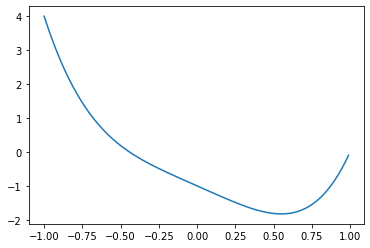

In [7]:
# Plot Function
vector = [x for x in np.arange(-1.0, 1.0, 0.01)]
figure, ax = plt.subplots()
ax.plot(vector, qfunct(vector))

In [ ]:
# Define Objective Function

In [8]:
def obj_funct(x):
    return 3 * x ** 4 - 2 * x + 1

In [ ]:
# Pass Objective Function to scipy minimize_scalar
"""obj_funct : first object that is passed to the minimize_scalar function
   bracket :   initial guess for optimizer
   method :    can be applied to tell optimizer within which bounds to search
   bounds :    tuple of lower and upper bounds.
   results :   scipy object that can be index by the result names.
"""

In [9]:
v1_results = minimize_scalar(obj_funct, bracket=[.1, .2, .3], method='bounded', bounds=(-1, 1))

In [10]:
print(v1_results)

     fun: 0.17451818779090322
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 0.5503228424279959


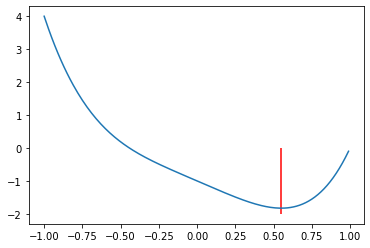

In [11]:
vector = [x for x in np.arange(-1.0, 1.0, 0.01)]
figure, ax = plt.subplots()
ax.plot(vector, qfunct(vector))
ax.vlines(v1_results['x'], ymin=-2, ymax=0, colors='red')

In [16]:
##################################################
# Minimize Function w/ Many Variables
##################################################

In [17]:
"""This function can handle multivariate inputs and outputs and has more 
   complicated optimization algorithms to be able to handle this. 
   In addition, minimize() can handle constraints on the 
   solution to your problem. 
   You can specify three types of constraints:
   - LinearConstraint: The solution is constrained by taking the inner product of the solution x values with
     a user-input array and comparing the result to a lower and upper bound.
   - NonlinearConstraint: The solution is constrained by applying a user-supplied function to the solution
     x values and comparing the return value with a lower and upper bound.
   - Bounds: The solution x values are constrained to lie between a lower and upper bound.

    Note: to maximize a function you want to multiply your objective function by -1 to find the x-values that produce
    the largest negative numbers.
"""

'This function can handle multivariate inputs and outputs and has more \n   complicated optimization algorithms to be able to handle this. \n   In addition, minimize() can handle constraints on the \n   solution to your problem. \n   You can specify three types of constraints:\n   - LinearConstraint: The solution is constrained by taking the inner product of the solution x values with\n     a user-input array and comparing the result to a lower and upper bound.\n   - NonlinearConstraint: The solution is constrained by applying a user-supplied function to the solution\n     x values and comparing the return value with a lower and upper bound.\n   - Bounds: The solution x values are constrained to lie between a lower and upper bound.\n\n    Note: to maximize a function you want to multiply your objective function by -1 to find the x-values that produce\n    the largest negative numbers.\n'

In [ ]:
# Maximize Revenue From Stock Sales

In [12]:
n_buyers = 10
n_shares = 15

In [13]:
np.random.seed(10)
prices = np.random.random(n_buyers)    # prices for each stock
money_available = np.random.randint(1, 4, n_buyers) # amount of money buyers have

In [ ]:
# Compute the maximum number of shares each buyer can purchase

In [14]:
n_shares_per_buyer = money_available / prices
print(prices, money_available, n_shares_per_buyer, sep="\n")

[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665
 0.19806286 0.76053071 0.16911084 0.08833981]
[1 1 1 3 1 3 3 2 1 1]
[ 1.29647768 48.18824404  1.57816269  4.00638948  2.00598984 13.34539487
 15.14670609  2.62974258  5.91328161 11.3199242 ]


In [ ]:
# Define Constraints

In [27]:
"""The constraint is that the sum of the total purchased shares
   can’t exceed the total number of shares available.
   
   To represent this mathematically, you could say that x[0] + x[1] + ... + x[n] = n_shares,
   where n is the total number of buyers.
   More succinctly, you could take the dot or inner product of a vector
   of ones with the solution values, and constrain that to be equal to n_shares.
   
   Remember that LinearConstraint takes the dot product of the input array with
   the solution values and compares it to the lower and upper bound. 
   
   Since LinearConstraint takes the dot product of the solution vector with this argument,
   it’ll result in the sum of the purchased shares.

   Since lb = ub = n_shares, this is an equality constraint because the sum of the values
   must be equal to both lb and ub.
   If lb were different from ub, then it would be an inequality constraint.
"""

'The constraint is that the sum of the total purchased shares\n   can’t exceed the total number of shares available.\n   \n   To represent this mathematically, you could say that x[0] + x[1] + ... + x[n] = n_shares,\n   where n is the total number of buyers.\n   More succinctly, you could take the dot or inner product of a vector\n   of ones with the solution values, and constrain that to be equal to n_shares.\n   \n   Remember that LinearConstraint takes the dot product of the input array with\n   the solution values and compares it to the lower and upper bound. \n   \n   Since LinearConstraint takes the dot product of the solution vector with this argument,\n   it’ll result in the sum of the purchased shares.\n\n   Since lb = ub = n_shares, this is an equality constraint because the sum of the values\n   must be equal to both lb and ub.\n   If lb were different from ub, then it would be an inequality constraint.\n'

In [15]:
constraint = LinearConstraint(np.ones(n_buyers), lb=n_shares, ub=n_shares)

In [16]:
np.ones(n_buyers)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# Bounds

In [ ]:
"""Next, create the bounds for the solution variable. The bounds limit the number of
   shares purchased to be 0 on the lower side and n_shares_per_buyer on the upper side.
   The format that minimize() expects for the bounds is a sequence of tuples of lower and upper bounds
"""

In [17]:
bounds = [(0, n) for n in n_shares_per_buyer]

In [ ]:
# Objective Function

In [ ]:
"""The income that you generate from each sale is the price that the buyer pays
   multiplied by the number of shares they’re buying. Mathematically, you could write
   this as prices[0]*x[0] + prices[1]*x[1] + ... + prices[n]*x[n], where n is again the
   total number of buyers.

   Once again, you can represent this more succinctly with the inner product, or x.dot(prices).
   This means that your objective function should take the current solution values x and the array
   of prices as arguments
"""

In [18]:
def objective_function(x, prices):
    return -x.dot(prices)

In [ ]:
# Call Function

In [ ]:
"""
objective_function: The first positional argument must be the function that you’re optimizing.

x0: The next argument is an initial guess for the values of the solution. In this case,
    you’re just providing a random array of values between 0 and 10, with the length of n_buyers.
    For some algorithms or some problems, choosing an appropriate initial guess may be important.
    However, for this example, it doesn’t seem too important.

args: The next argument is a tuple of other arguments that are necessary to be passed into the
    objective function. minimize() will always pass the current value of the solution x into the
    objective function, so this argument serves as a place to collect any other input necessary.
    In this example, you need to pass prices to objective_function(), so that goes here.

constraints: The next argument is a sequence of constraints on the problem. You’re passing the
    constraint you generated earlier on the number of available shares.

bounds: The last argument is the sequence of bounds on the solution variables that you generated earlier.
"""

In [19]:
v2_result = minimize(
    objective_function,
    x0=10 * np.random.random(n_buyers),
    args=(prices,),
    constraints=constraint,
    bounds=bounds,
)

In [ ]:
# Results

In [33]:
"""
Since the optimization was successful, fun shows the value of the objective
function at the optimized solution values. You’ll make an income of $8.78 from this sale.
"""

'\nSince the optimization was successful, fun shows the value of the objective\nfunction at the optimized solution values. You’ll make an income of $8.78 from this sale.\n'

In [20]:
print(v2_result)

     fun: -8.783020157087599
     jac: array([-0.7713207 , -0.02075195, -0.6336484 , -0.74880397, -0.49850702,
       -0.22479653, -0.19806278, -0.76053071, -0.16911077, -0.08833981])
 message: 'Optimization terminated successfully'
    nfev: 187
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([1.29647768e+00, 1.44883543e-13, 1.57816269e+00, 4.00638948e+00,
       2.00598984e+00, 3.48323773e+00, 2.99760217e-14, 2.62974258e+00,
       1.13511185e-14, 3.99716714e-14])


In [22]:
print("The total number of shares is:", sum(v2_result.x))
print("Leftover money for each buyer:", money_available - v2_result.x * prices)

The total number of shares is: 15.000000000000002
Leftover money for each buyer: [1.32116540e-14 1.00000000e+00 1.33226763e-14 2.62012634e-14
 1.58761893e-14 2.21697984e+00 3.00000000e+00 3.08642001e-14
 1.00000000e+00 1.00000000e+00]
